# 📞 Telco Customer Churn Prediction - Exploratory Data Analysis

This notebook performs EDA to uncover patterns in customer behavior related to churn. We explore both categorical and numerical features and how they relate to the target variable `Churn`.

In [1]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# 📁 Load Dataset
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 🧾 Dataset Overview & Missing Values

In [2]:
df.info()
df.describe(include='all')
df.isnull().sum().sort_values(ascending=False).head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID         0
gender             0
SeniorCitizen      0
Partner            0
Dependents         0
tenure             0
PhoneService       0
MultipleLines      0
InternetService    0
OnlineSecurity     0
dtype: int64

## 🎯 Churn Distribution

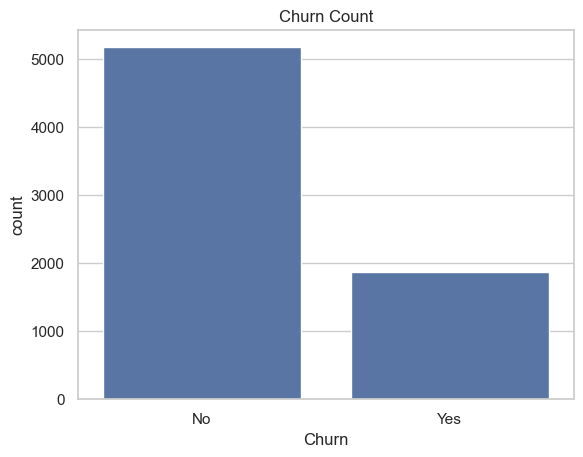

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [3]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Count')
plt.show()
print(df['Churn'].value_counts(normalize=True))

## 📈 Numerical Features Distributions

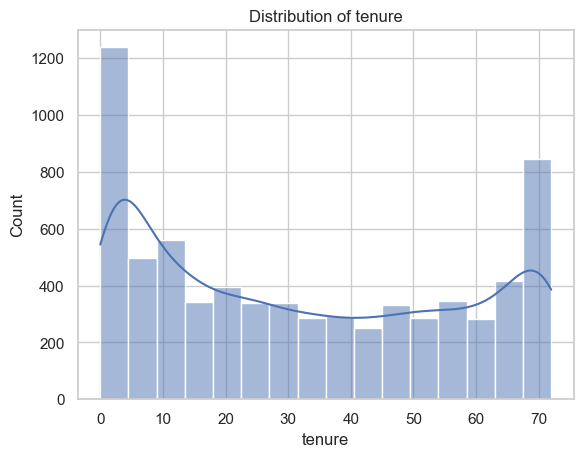

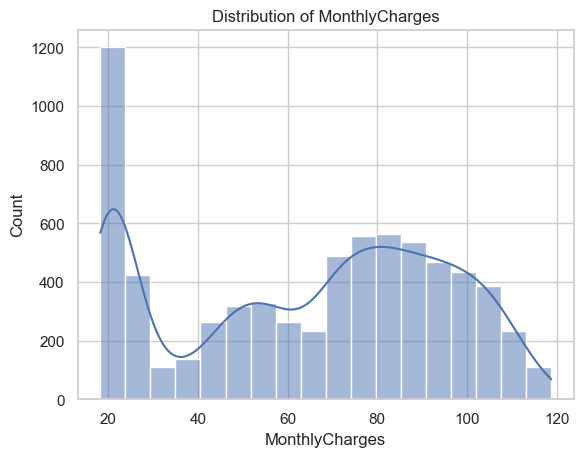

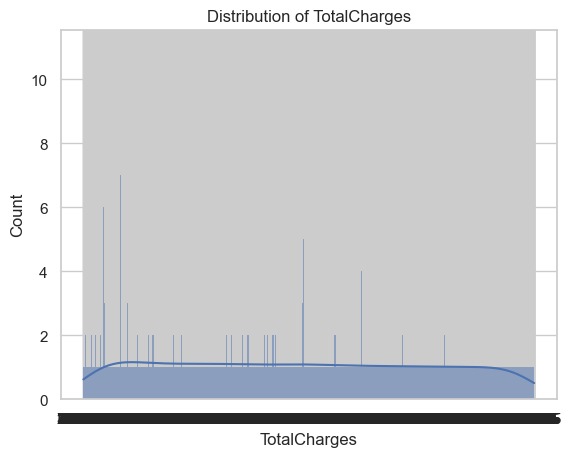

In [4]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in num_cols:
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

## 🔍 Categorical Features vs Churn

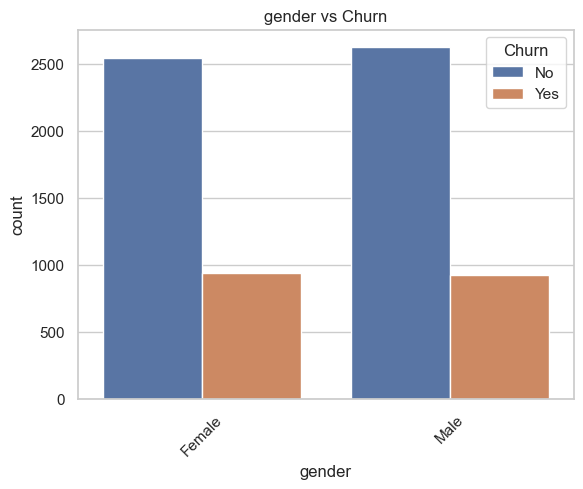

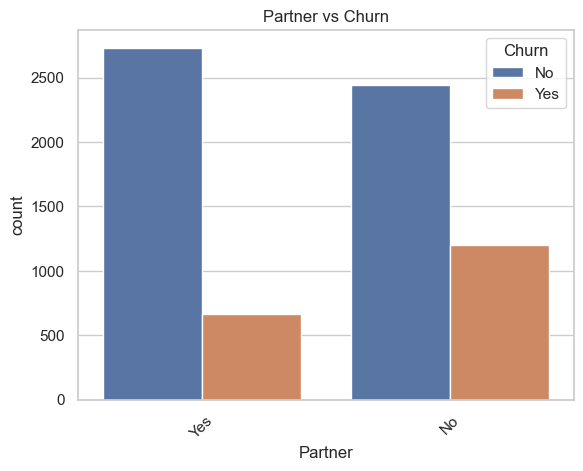

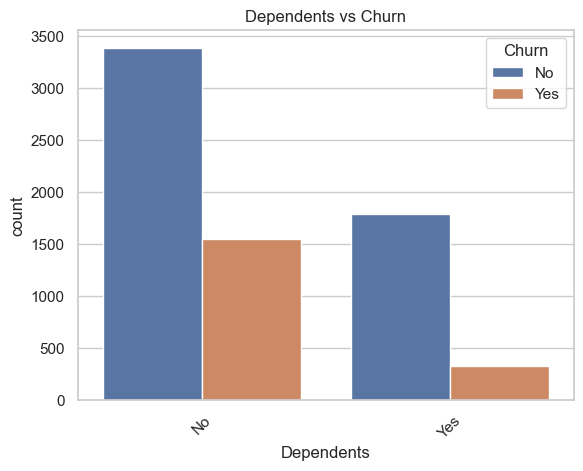

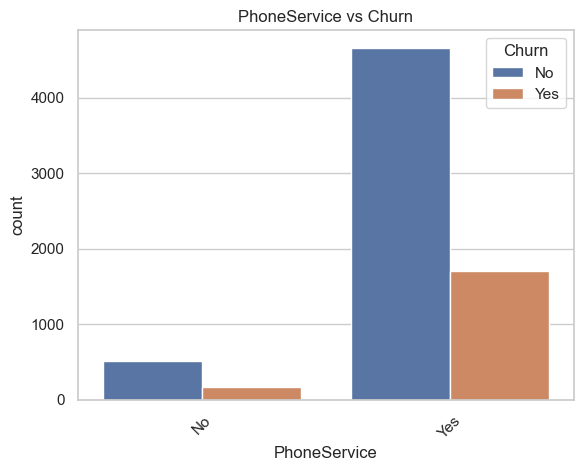

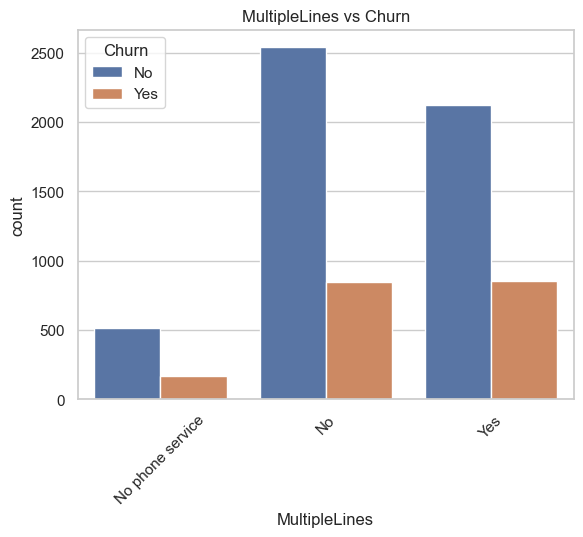

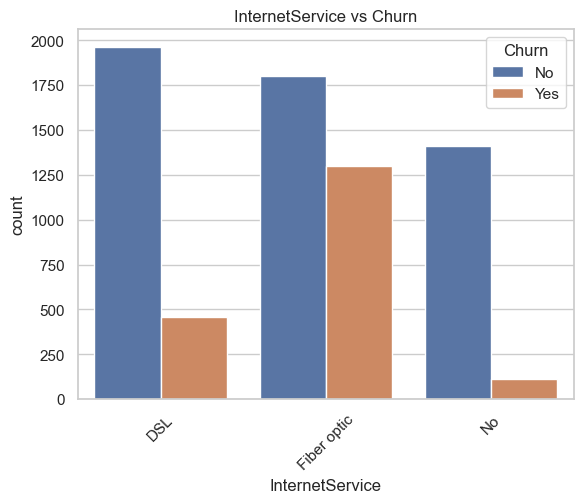

In [5]:
cat_cols = df.select_dtypes(include='object').columns.drop('customerID')
for col in cat_cols[:6]:
    if df[col].nunique() <= 10:
        sns.countplot(x=col, hue='Churn', data=df)
        plt.title(f"{col} vs Churn")
        plt.xticks(rotation=45)
        plt.show()

## 🎯 Boxplots of Numerical Features by Churn

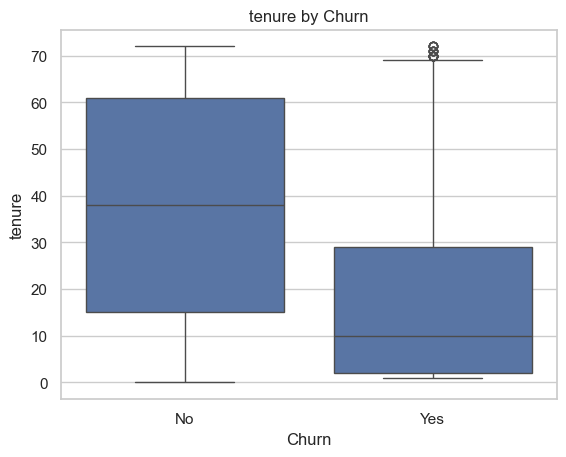

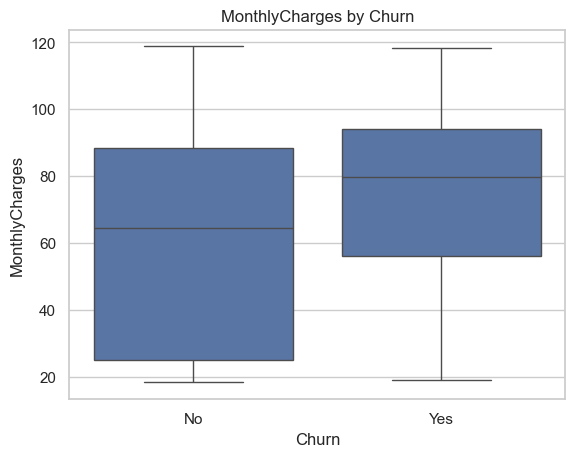

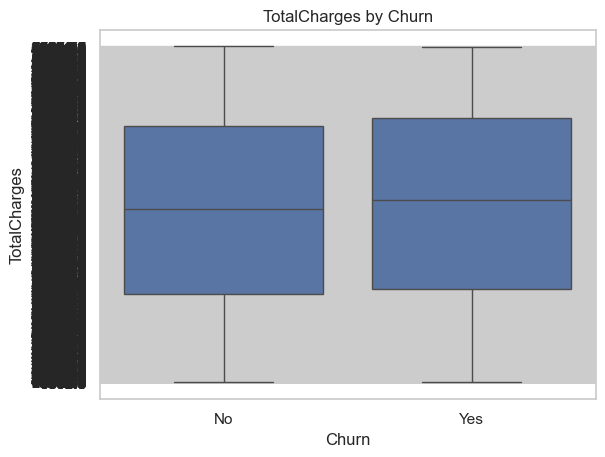

In [6]:
for col in num_cols:
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f"{col} by Churn")
    plt.show()